In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

dataset = 'london'
aspects = ['cleanliness', 'room', 'service', 'location', 'value', 'safety', 'comfort', 'transportation', 'noise']
aggregated_scores = pd.read_csv(f'csv/{dataset}_normalized_scores.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'csv/london_normalized_scores.csv'

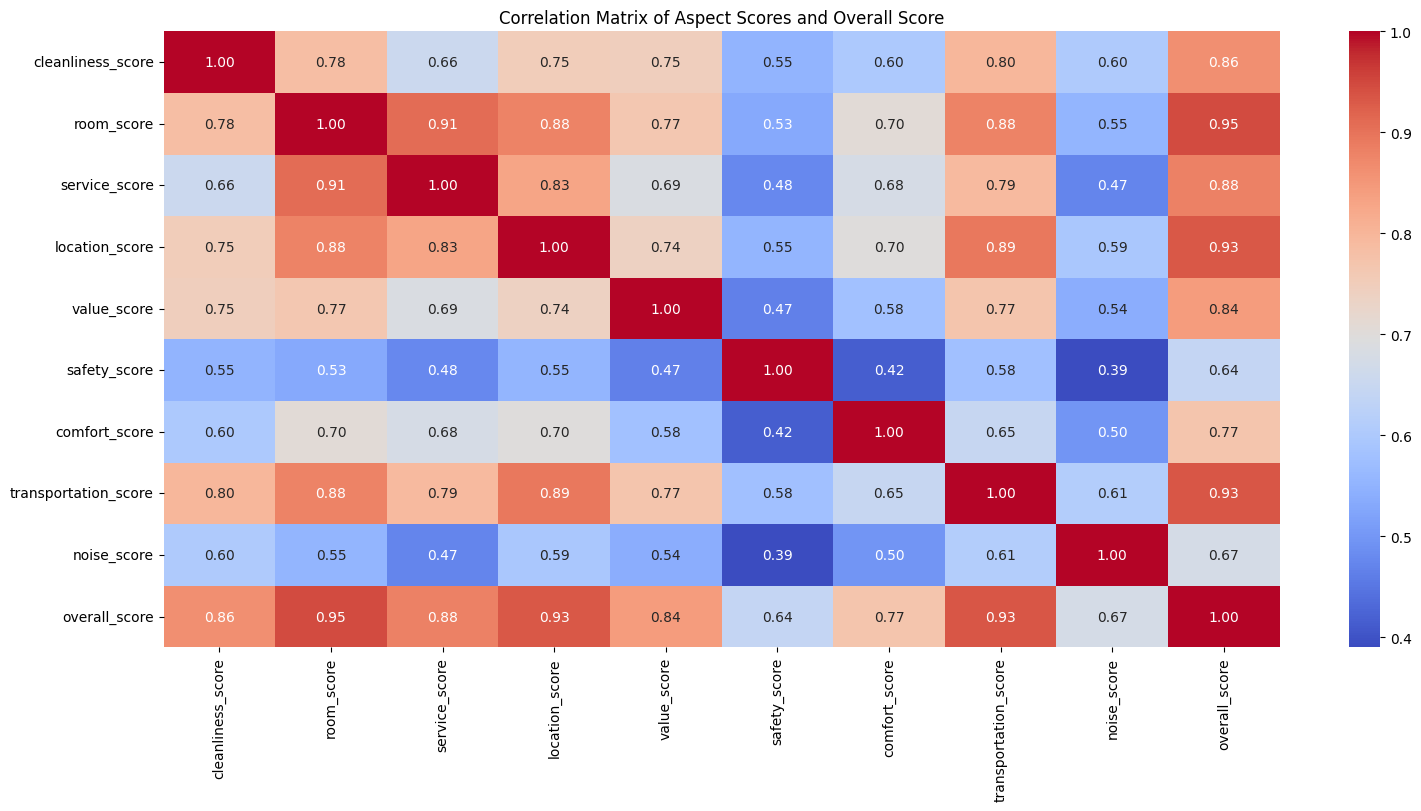

In [ ]:
aggregated_scores['overall_score'] = aggregated_scores[[f'{aspect}_score' for aspect in aspects]].mean(axis=1)

correlation_matrix = aggregated_scores[[f'{aspect}_score' for aspect in aspects] + ['overall_score']].corr()

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Aspect Scores and Overall Score')
plt.show()

In [ ]:
X = aggregated_scores[[f'{aspect}_score' for aspect in aspects]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=len(aspects))
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

loadings = np.abs(pca.components_)
aspect_importance = np.dot(loadings.T, explained_variance)
importance_df = pd.DataFrame({'Aspect': aspects, 'Importance': aspect_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

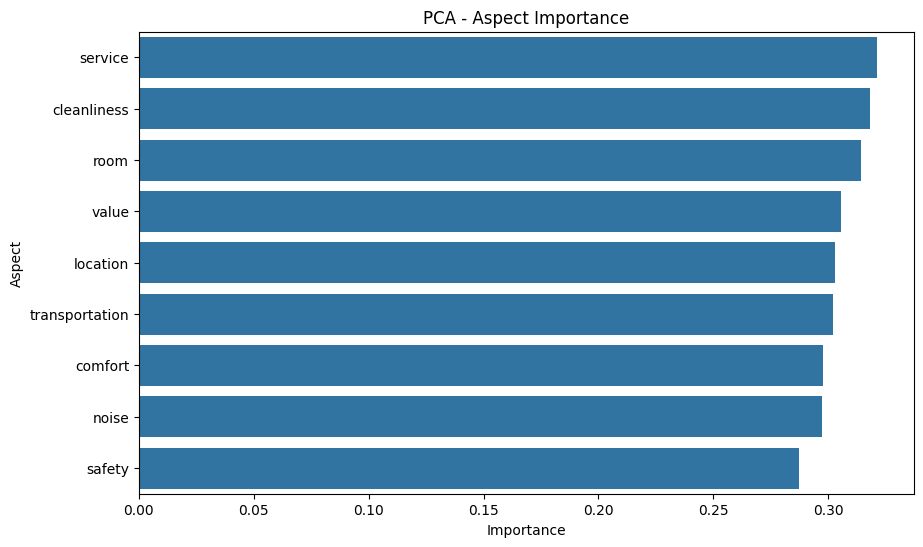

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Aspect', data=importance_df)
plt.title('PCA - Aspect Importance')
plt.xlabel('Importance')
plt.ylabel('Aspect')
plt.show()

In [ ]:
print(importance_df)

           Aspect  Importance
0     cleanliness    0.324395
2         service    0.321256
6         comfort    0.314515
3        location    0.310704
4           value    0.304845
1            room    0.303235
7  transportation    0.301637
8           noise    0.295920
5          safety    0.273379


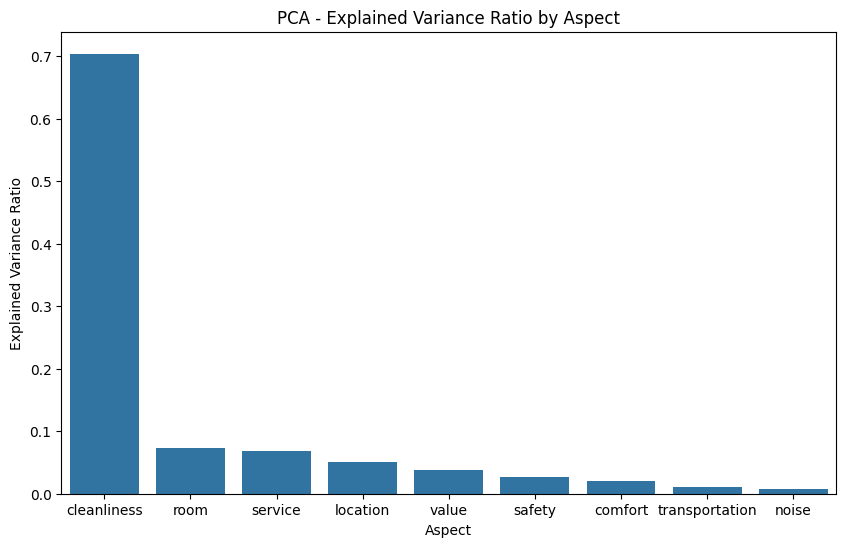

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=aspects, y=explained_variance)
plt.title('PCA - Explained Variance Ratio by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
components = pd.DataFrame(pca.components_, columns=aspects)
print(components)

   cleanliness      room   service  location     value    safety   comfort  \
0    -0.343976 -0.374295 -0.347671 -0.369840 -0.334670 -0.255444 -0.307158   
1     0.148478 -0.199371 -0.321719 -0.104178 -0.058518  0.809927 -0.292044   
2     0.123126 -0.145203 -0.255565 -0.066654  0.074208 -0.450820 -0.000923   
3    -0.286719 -0.076995  0.034073 -0.009286 -0.469774  0.217280  0.757641   
4     0.394082 -0.198675 -0.403329 -0.244632  0.487979 -0.003585  0.482817   
5     0.694985  0.075443 -0.141283  0.063780 -0.646770 -0.153374 -0.005649   
6    -0.282220 -0.238837 -0.515502  0.547575  0.003684 -0.066373  0.075028   
7     0.154772 -0.190116  0.055790  0.694029  0.042909  0.009050 -0.084496   
8     0.142688 -0.809192  0.507600 -0.049087  0.009326 -0.017129  0.020745   

   transportation     noise  
0       -0.371212 -0.272996  
1       -0.001282  0.281340  
2       -0.026305  0.827383  
3       -0.175444  0.194724  
4       -0.168299 -0.288333  
5        0.151923 -0.149422  
6        

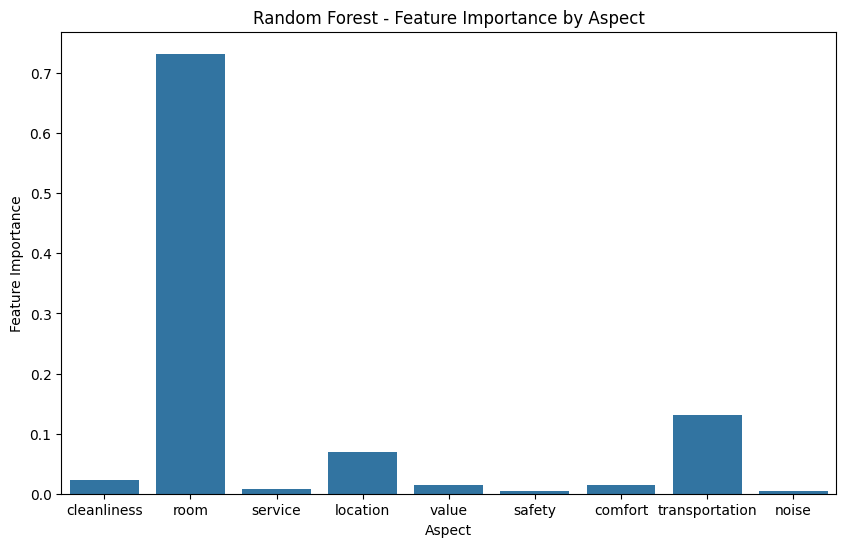

           Aspect  Importance
0     cleanliness    0.022632
1            room    0.732225
2         service    0.007198
3        location    0.068649
4           value    0.014135
5          safety    0.004465
6         comfort    0.015216
7  transportation    0.130628
8           noise    0.004852


In [ ]:
aggregated_scores['overall_score'] = aggregated_scores[[f'{aspect}_score' for aspect in aspects]].mean(axis=1)
X = aggregated_scores[[f'{aspect}_score' for aspect in aspects]]
y = aggregated_scores['overall_score']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=aspects, y=feature_importances)
plt.title('Random Forest - Feature Importance by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Feature Importance')
plt.show()

# Display feature importances
importances = pd.DataFrame({'Aspect': aspects, 'Importance': feature_importances})
print(importances)

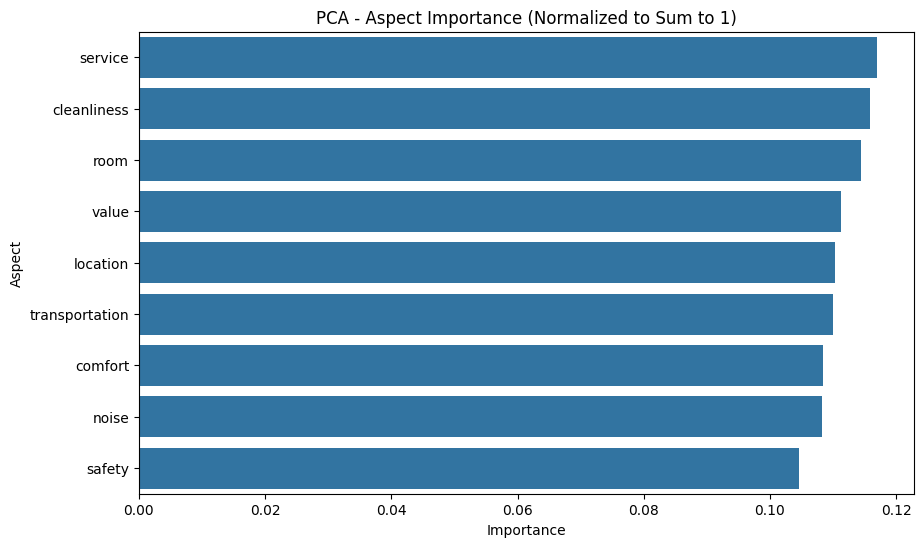

           Aspect  Importance
2         service    0.116970
0     cleanliness    0.115889
1            room    0.114399
4           value    0.111267
3        location    0.110330
7  transportation    0.110073
6         comfort    0.108339
8           noise    0.108196
5          safety    0.104538


In [ ]:
X = aggregated_scores[[f'{aspect}_score' for aspect in aspects]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=len(aspects))
pca.fit(X_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Get the absolute values of the PCA components (loadings)
loadings = np.abs(pca.components_)

# Calculate the importance of each aspect
aspect_importance = np.dot(loadings.T, explained_variance)

# Normalize the aspect importance so that the sum equals 1
total_importance = np.sum(aspect_importance)
normalized_importance = aspect_importance / total_importance

importance_df = pd.DataFrame({'Aspect': aspects, 'Importance': normalized_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the aspect importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Aspect', data=importance_df)
plt.title('PCA - Aspect Importance')
plt.xlabel('Importance')
plt.ylabel('Aspect')
plt.show()

print(importance_df)

In [3]:
import pandas as pd
df = pd.read_csv('csv/overall_sentiment_scores.csv')

In [4]:
df.to_excel('csv/overall_sentiment_scores.xlsx')